In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

X = np.load('/content/drive/MyDrive/Deep2025/MN40_voxel_simple/MN40_X_voxel_full.npy')
y = np.load('/content/drive/MyDrive/Deep2025/MN40_voxel_simple/MN40_y_voxel_full.npy')

print("✅ Done:")
print("🔸 X:", X.shape)
print("🔸 y_class:", y_class.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Done:
🔸 X: (9843, 32, 32, 32, 1)
🔸 y_class: (9843,)


In [ ]:
num_classes = len(np.unique(y))
print(num_classes)

40


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

model = Sequential([
    Conv3D(32, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling3D(pool_size=2),
    Dropout(0.5),

    Conv3D(64, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling3D(pool_size=2),
    Dropout(0.3),

    Conv3D(128, kernel_size=3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling3D(pool_size=2),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_val, y_val),
    batch_size=8,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.1961 - loss: 4.4938 - val_accuracy: 0.3504 - val_loss: 2.4354 - learning_rate: 0.0010
Epoch 2/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2789 - loss: 2.7289 - val_accuracy: 0.4601 - val_loss: 2.0651 - learning_rate: 0.0010
Epoch 3/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3067 - loss: 2.5435 - val_accuracy: 0.4962 - val_loss: 1.8094 - learning_rate: 0.0010
Epoch 4/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.3280 - loss: 2.4050 - val_accuracy: 0.5190 - val_loss: 1.7623 - learning_rate: 0.0010
Epoch 5/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3362 - loss: 2.3324 - val_accuracy: 0.5490 - val_loss: 1.6131 - learning_rate: 0.0010
Epoch 6/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.3475 - loss: 2.2733 - val_accuracy: 0.5592 - val_loss: 1.4838 - learning_rate: 0.0010
Epoch 7/40
985/985 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3606 - l

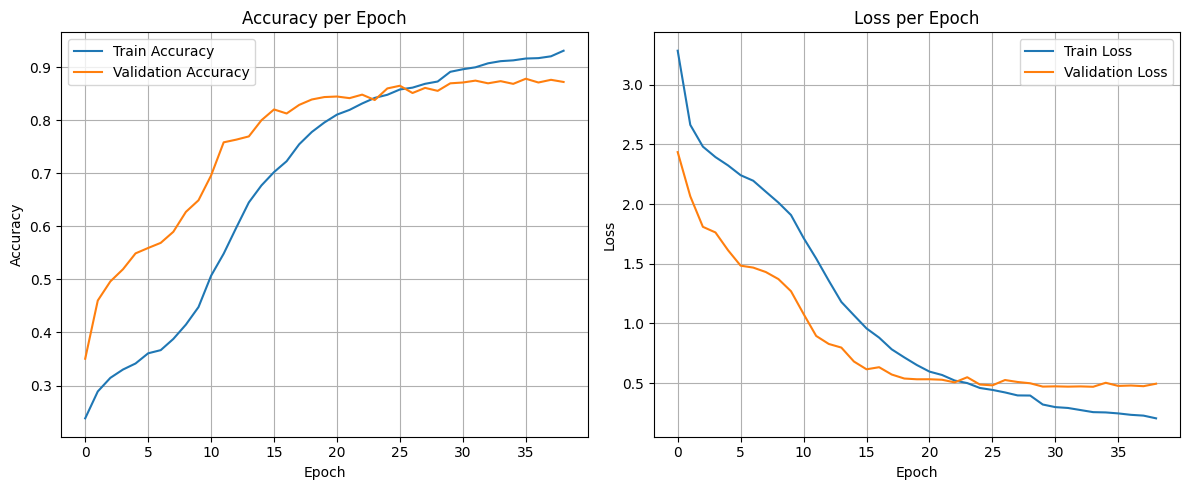

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model.save("voxelnet_model.h5")
model.save("voxelnet_model.keras")  #  "voxelnet_model.keras"